# FEMA Disaster Cost Forecasting
#### Capstone 2 - Modeling
Michael Garber

* Please run these notebooks in order to create needed data for this notebook.
    * On Github 
        1. > [FEMA-DataWrangling.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/ef70129c4bf06a38b13c61e1254fdb6a3105486b/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb)
        2. > [FEMA-EDA.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/ef70129c4bf06a38b13c61e1254fdb6a3105486b/femadisastercostforecasting/notebooks/FEMA-EDA.ipynb)
        3. > [FEMA-Preprocessinging.ipynb on Github](https://github.com/mdgarber/FEMADisasterCostForecasting/blob/2f76bf8a14b23fe31cdf044209ef6cdbcad78fb6/femadisastercostforecasting/notebooks/FEMA-Preprocessing.ipynb)
    * OR local path
        1. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-DataWrangling.ipynb
        2. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-EDA.ipynb
        3. > /FEMADisasterCostForecasting/femadisastercostforecasting/notebooks/FEMA-Preprocessing.ipynb

#### Modeling High-Level Steps

> **Goal**: Build two to three different models and identify the best one.

1. Import Libraries
2. Import Data
3. Review model types
4. Choose 2-3 models
5. Additional EDA
6. Feature engineering 
7. Train/Test Split
8. Preprocessing
9. Hyperparameter tuning
10. Fit models to training data
11. Make Predictions and Evaluate Models

## Step 1 - Import libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import randint

## Step 2 - Import Data

In [7]:
# load data
femaDataCleanV3 = pd.read_csv('../data/interim/femaDataCleanV3.csv', low_memory=False)   

## using "low_memory=False" to prevent error..."DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False."

## Step 3 - Review Model Types

[Machine Learning Algorithms - Datacamp](https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet)

## Step 4 - Choose 2-3 models

1. Linear Regression
2. Lasso Regression
3. Random Forests


## Step 5 - Additional EDA

1. Review features
2. Feature Selection 
    1. feature correlation to target
    2. Variance threshold  
    3. feature importance from tree model (later?)
3. Find time range of the data

In [11]:
# Review all features
femaDataCleanV3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 134 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    declarationDate                       5013 non-null   object 
 1    disasterName                          5013 non-null   object 
 2    incidentBeginDate                     5013 non-null   object 
 3    incidentEndDate                       4693 non-null   object 
 4    declarationType                       5013 non-null   object 
 5    stateName                             5013 non-null   object 
 6    entryDate                             5013 non-null   object 
 7    updateDate                            5013 non-null   object 
 8    closeoutDate                          3969 non-null   object 
 9    ihProgramDeclared                     5013 non-null   float64
 10   iaProgramDeclared                     5013 non-null   float64
 11   pa

In [12]:
# fix data in totalDisasterCost column
# column was incorrectly calculated in previous NB. 
# These fields removing these hierarchical/constituent fields...totalAmountHaApproved, totalAmountOnaApproved, totalObligatedAmountCatAb,totalObligatedAmountCatC2g
femaDataCleanV3['totalDisasterCost'] =(femaDataCleanV3['totalAmountIhpApproved'] +
                                       femaDataCleanV3['totalObligatedAmountPa'] +
                                       femaDataCleanV3['totalObligatedAmountHmgp'])

In [13]:
# Set the maximum number of rows to be displayed from pandas DataFramae 
pd.set_option('display.max_rows', 150)

In [14]:
# check feature correlations to target (totalDisasterCost)
tempVar = femaDataCleanV3.select_dtypes(exclude='object').corr()

# see top linearly correlated features
pd.DataFrame(tempVar['totalDisasterCost'].sort_values(ascending=False))
# step drop off in linear correlation from totalNumberIaApproved to ihProgramDeclared

,totalDisasterCost
totalDisasterCost,1.000000
totalObligatedAmountPa_StdScaled,0.991093
totalObligatedAmountPa,0.991093
totalObligatedAmountCatC2g,0.856188
totalObligatedAmountCatC2g_StdScaled,0.856188
totalObligatedAmountCatAb_StdScaled,0.721778
totalObligatedAmountCatAb,0.721778
totalObligatedAmountHmgp_StdScaled,0.699178
totalObligatedAmountHmgp,0.699178
totalAmountOnaApproved_StdScaled,0.645749


<Axes: >

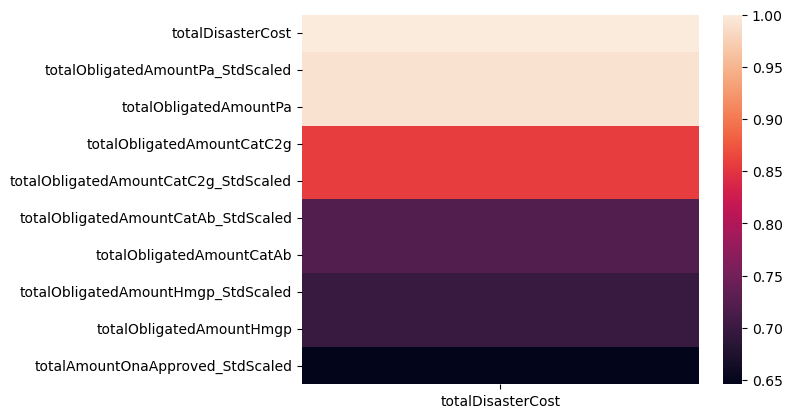

In [15]:
# heat map - feature correlation to target
sns.heatmap(pd.DataFrame(tempVar['totalDisasterCost'].sort_values(ascending=False)).head(10))

In [16]:
# check the standard deviation of features - a low variance implies a feature is low value as an explanatory variable
femaDataStdDevs = pd.DataFrame(femaDataCleanV3.std(numeric_only=True), columns=['Standard Deviation']).sort_values(by='Standard Deviation', ascending=False)

femaDataStdDevs

# values already normal scaled are std ~= 1

,Standard Deviation
totalDisasterCost,7.723566e+08
totalObligatedAmountPa,6.947603e+08
totalObligatedAmountCatC2g,4.526207e+08
totalObligatedAmountCatAb,3.630115e+08
totalAmountIhpApproved,9.396792e+07
totalAmountHaApproved,6.552160e+07
totalObligatedAmountHmgp,3.576138e+07
totalAmountOnaApproved,3.228710e+07
totalNumberIaApproved,2.714044e+04
totalObligatedAmountCatC2g_StdScaled,1.000100e+00


In [17]:
# find time range of data
oldestIncident = pd.to_datetime(femaDataCleanV3.incidentBeginDate).min()
latestIncident = pd.to_datetime(femaDataCleanV3.incidentBeginDate).max()

print('The time range of the data is between...\n' + str(oldestIncident) + ' and ' + str(latestIncident))

The time range of the data is between...
1953-05-02 00:00:00+00:00 and 2024-11-11 00:00:00+00:00


## Step 6 - Feature Engineering
    1. specify and filter discrete time range for analysis (e.x. 10 years leading to 2025)
    2. *Derive Annual summary table for key features grouped features*
        1. features to engineer: Incident year

In [19]:
# create new DataFrame
femaDataCleanV4 = femaDataCleanV3.copy()

# create new column - incidentYear
femaDataCleanV4['incidentYear'] = pd.to_datetime(femaDataCleanV3['incidentBeginDate']).dt.year

# filter data to years: 1980-2023 - new DF 'femaDataCleanV4'
femaDataCleanV4 = femaDataCleanV4.loc[(femaDataCleanV4['incidentYear'] >= 1980) & (femaDataCleanV4['incidentYear'] <= 2023)].copy()

In [20]:
# drop outliers 

# identify outliers (totaldisastercost > 3 st. devs)
#outlier_limit = femaDataCleanV4['totalDisasterCost'].std() * 3

#get index of outliers
#indexesToDrop = femaDataCleanV4[femaDataCleanV4['totalDisasterCost'] > outlier_limit].index

#drop outliers
#femaDataCleanV4.drop(index=indexesToDrop, inplace=True)

#### Note 
- FEMA was established in 1979
- Disaster/Incident data was collected starting in 1953, but no FEMA funding actions occurred until 1980
- [https://www.fema.gov/about/history](https://www.fema.gov/about/history)

In [22]:
# create annual summary table
femaDataCleanV4.head()

,declarationDate,disasterName,incidentBeginDate,incidentEndDate,declarationType,stateName,entryDate,updateDate,closeoutDate,ihProgramDeclared,...,region_9,region_10,totalAmountIhpApproved_StdScaled,totalAmountHaApproved_StdScaled,totalAmountOnaApproved_StdScaled,totalObligatedAmountPa_StdScaled,totalObligatedAmountCatAb_StdScaled,totalObligatedAmountCatC2g_StdScaled,totalObligatedAmountHmgp_StdScaled,incidentYear
99,2024-05-15T00:00:00.000Z,SEVERE STORMS AND FLOODING,2023-09-11T00:00:00.000Z,2023-09-13T00:00:00.000Z,Major Disaster,Massachusetts,2024-05-16T00:00:00.000Z,2024-05-16T00:00:00.000Z,NaN,1.0,...,False,False,0.003042,0.007849,-0.007075,-0.069262,-0.073007,-0.041418,-0.083414,2023
113,2024-04-06T00:00:00.000Z,"SEVERE STORM, FLOODING, AND LANDSLIDES",2023-11-20T00:00:00.000Z,2023-11-20T00:00:00.000Z,Major Disaster,Alaska,2024-04-06T00:00:00.000Z,2024-04-06T00:00:00.000Z,NaN,0.0,...,False,True,-0.077313,-0.068038,-0.086938,-0.069262,-0.073007,-0.041418,-0.083414,2023
115,2024-03-20T00:00:00.000Z,SEVERE STORM AND FLOODING,2023-12-17T00:00:00.000Z,2023-12-19T00:00:00.000Z,Major Disaster,Rhode Island,2024-03-21T00:00:00.000Z,2024-03-21T00:00:00.000Z,NaN,1.0,...,False,False,-0.010534,0.024797,-0.080979,-0.069262,-0.073007,-0.041418,-0.083414,2023
117,2024-03-15T00:00:00.000Z,"SEVERE STORM, LANDSLIDES, AND MUDSLIDES",2023-11-20T00:00:00.000Z,2023-11-20T00:00:00.000Z,Major Disaster,Alaska,2024-03-16T00:00:00.000Z,2024-03-19T00:00:00.000Z,NaN,1.0,...,False,True,-0.076494,-0.067289,-0.086074,-0.069262,-0.073007,-0.041418,-0.083414,2023
118,2024-03-02T00:00:00.000Z,SEVERE STORM AND FLOODING,2023-12-18T00:00:00.000Z,2023-12-19T00:00:00.000Z,Major Disaster,Vermont,2024-03-02T00:00:00.000Z,2024-03-02T00:00:00.000Z,NaN,0.0,...,False,False,-0.077313,-0.068038,-0.086938,-0.069262,-0.073007,-0.041418,-0.083414,2023


In [23]:
# create Annual summaries table for year-by-year analysis
femaAnnualStats = femaDataCleanV4.select_dtypes(exclude='object').copy()

# Create grouped and summed totals by year
femaAnnualStats = femaAnnualStats.groupby(by='incidentYear').sum().copy()

In [24]:
# remove already scaled features (*Std_scaled) and multi-colinear features (totalAmountHaApproved, totalAmountOnaApproved, totalObligatedAmountCatAb,totalObligatedAmountCatC2g)
femaAnnualStats = femaAnnualStats.drop(columns=['totalAmountIhpApproved_StdScaled',
                                                'totalAmountHaApproved_StdScaled', 
                                                'totalAmountOnaApproved_StdScaled',
                                                'totalObligatedAmountPa_StdScaled',
                                                'totalObligatedAmountCatAb_StdScaled',
                                                'totalObligatedAmountCatC2g_StdScaled',
                                                'totalObligatedAmountHmgp_StdScaled',
                                                'totalAmountHaApproved',
                                                'totalAmountOnaApproved',
                                                'totalObligatedAmountCatAb',
                                                'totalObligatedAmountCatC2g']).copy()

In [25]:
# display annual summary table
femaAnnualStats.head()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,totalNumberIaApproved,totalAmountIhpApproved,totalObligatedAmountPa,totalObligatedAmountHmgp,totalDisasterCost,incidentType_Biological,...,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10
incidentYear,,,,,,,,,,,,,,,,,,,,,
1980,0.0,22.0,23.0,22.0,0.0,0.0,131270.0,0.0,131270.0,0,...,1,2,3,3,5,5,2,1,7,2
1981,0.0,13.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,1,3,2,3,1,1,5,2
1982,0.0,21.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,5,5,5,3,2,4,1
1983,0.0,19.0,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,5,1,8,0,1,9,2
1984,0.0,28.0,31.0,31.0,0.0,0.0,0.0,0.0,0.0,0,...,2,4,3,8,2,7,5,6,1,2


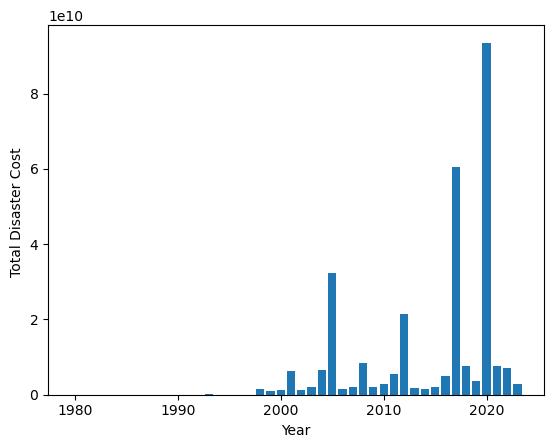

In [26]:
# chart total disaster cost annually
plt.bar(x=femaAnnualStats.index, height=femaAnnualStats['totalDisasterCost'])
plt.xlabel('Year')
plt.ylabel('Total Disaster Cost ')
plt.show()

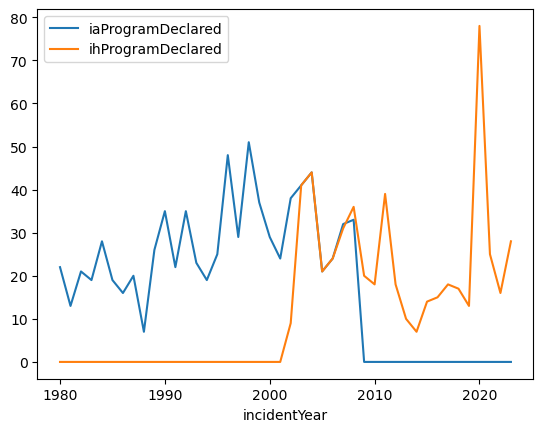

In [27]:
# Explore data anomaly - ihProgramDeclared seems to take over for iaProgramDeclared at year 2023
# At FEMA, IA (Individual Assistance program) is an umbrella program for IH (Individual and House

# scaler for tds
tdcScaler = MinMaxScaler(feature_range=(0, 20))  # or MinMaxScaler()
tdsScaled = pd.DataFrame(tdcScaler.fit_transform(femaAnnualStats['totalDisasterCost'].array.reshape(-1, 1)), index=femaAnnualStats.index)
#print(tdsScaled)

#tdsScaled.plot()
femaAnnualStats['iaProgramDeclared'].plot()
#femaAnnualStats['paProgramDeclared'].plot()
#femaAnnualStats['hmProgramDeclared'].plot()
femaAnnualStats['ihProgramDeclared'].plot()
plt.legend()
plt.show()

In [28]:
# create new field to take cutover iaProgramDeclared to ihProgramDeclared at year 2003
femaAnnualStats['iaCutoverIhProgramDeclared'] = pd.concat(
    [femaAnnualStats['iaProgramDeclared'][femaAnnualStats.index < 2004 ], 
     femaAnnualStats['ihProgramDeclared'][femaAnnualStats.index >= 2004 ]])

## Step 7 - Train/Test Split

In [30]:
# set X & y
y = femaAnnualStats['totalDisasterCost'].copy()
femaAnnualStats_colNames = femaAnnualStats.drop(columns=['totalDisasterCost']).columns
X = femaAnnualStats.drop(columns=['totalDisasterCost'])

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, shuffle=False)

## Step 8 -  Preprocessing
    1. Linear regression model - use robust scaler to handle outliers
    2. Lasso regression model - use standard scaler
    3. Random Forest regression model - shouldn't need scaling

In [32]:
# Preprocessing - Make robust scaled data set 
#  (for linear regression as it is outlier sensitive)

# standard scale X
standardScaler = StandardScaler().fit(X_train)
X_train_std    = standardScaler.transform(X_train)
X_test_std     = standardScaler.transform(X_test)

# robust scale X
robustScaler   = RobustScaler().fit(X_train)
X_train_robust = robustScaler.transform(X_train)
X_test_robust  = robustScaler.transform(X_test)

## Step 9 - Hyperparameter Tuning
> https://scikit-learn.org/stable/modules/grid_search.html

- Linear Regression
    - *Does not use hyperparameters but sensitive outliers. Using a robust scaled data set to handle outliers*
- Lasso Regression
    - regularization parameter (alpha)
- Random Forests
    - n_estimators
    - max_features
    - max_depth

In [34]:
# Lasso Regression - Tune regularization parameter (alpha)

# will use LassoCV which performs built-in hyperparameter search
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [35]:
# Create Random Forests regression object - Tune n_estimators, max_features, max_depth
randomForestReg = RandomForestRegressor(random_state = 11)

# set parameters for randomizedSearchCV
param_dist = {
    'n_estimators': randint(1, 100),
    'max_features': randint(1, 6),
    'max_depth': randint(1, 50)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = randomForestReg, 
    param_distributions = param_dist, 
    n_iter = 60, 
    cv = 5, 
    scoring = 'neg_mean_squared_error', 
    random_state = 11
)

# Fit the randomized search to data
random_search.fit(X, y)

# Get the best parameters and best estimator
print("Best estimator: ", random_search.best_estimator_)

Best estimator:  RandomForestRegressor(max_depth=5, max_features=5, n_estimators=35,
                      random_state=11)


## Step 10 - Fit models to training data

In [37]:
# Linear Regression (no scaling)
linReg = LinearRegression().fit(X_train, y_train)

# score linear regression model
print('Linear Regression R^2 Score: ' + str(linReg.score(X_test, y_test)))

Linear Regression R^2 Score: 1.0


In [38]:
# Linear Regression (robust scaled)
linReg_robust = LinearRegression().fit(X_train_robust, y_train)

# score linear regression model
print('Linear Regression (robust scaled) R^2 Score: ' + str(linReg_robust.score(X_test_robust, y_test)))

Linear Regression (robust scaled) R^2 Score: 0.8145783119057419


In [39]:
# Lasso Linear Regression w/ hyperparameter tuning
lassoRegCV = LassoCV(cv = 5, random_state = 11).fit(X_train, y_train)

# score linear regression model
print('Linear Regression (Lasso) R^2 Score: ' + str(lassoRegCV.score(X_test, y_test)))

# most important features - totalAmountIhpApproved, totalObligatedAmountPa, totalObligatedAmountCatC2g

Linear Regression (Lasso) R^2 Score: 0.9907397639432234


In [40]:
# Random Forests (using tuned hyperparameters)
#     Best estimator:  RandomForestRegressor(max_depth=5, max_features=34, n_estimators=2,random_state=11)
randForestReg = RandomForestRegressor(max_depth = 5, max_features = 34, n_estimators = 2, random_state = 11)
randForestReg = randForestReg.fit(X_train, y_train)

# score Random Forests model
print('Random Forests R^2 Score: ' + str(randForestReg.score(X_test, y_test)))

Random Forests R^2 Score: 0.2547074532142839


## Step 11 - Make Predictions and Evaluate Models

In [42]:

# Make predictions
y_pred_linReg = linReg.predict(X_test)
y_pred_linReg_robust = linReg_robust.predict(X_test_robust)
y_pred_lassoRegCV = lassoRegCV.predict(X_test)
y_pred_randForest = randForestReg.predict(X_test)

# convert back to DF and index
y_pred_linReg = pd.DataFrame(y_pred_linReg, index=y_test.index)
y_pred_linReg_robust = pd.DataFrame(y_pred_linReg_robust, index=y_test.index)
y_pred_lassoRegCV = pd.DataFrame(y_pred_lassoRegCV, index=y_test.index)
y_pred_randForest = pd.DataFrame(y_pred_randForest, index=y_test.index)

# Evaluate Models
MSE_linReg = mean_squared_error(y_test, y_pred_linReg)
MSE_linReg_robust = mean_squared_error(y_test, y_pred_linReg_robust)
MSE_lassoRegCV = mean_squared_error(y_test, y_pred_lassoRegCV)
MSE_randForest = mean_squared_error(y_test, y_pred_randForest)


# C:\Users\MG-Laptop\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
#  warnings.warn(

In [43]:
# Print Results
print('MSE - Linear Regression         : ' + str(MSE_linReg))
print('MSE - Linear Regression (robust): ' + str(MSE_linReg_robust))
print('MSE - Linear Regression (Lasso) : ' + str(MSE_lassoRegCV))
print('MSE - Random Forest             : ' + str(MSE_randForest))

MSE - Linear Regression         : 4.729682504231195e-10
MSE - Linear Regression (robust): 1.5566111179531813e+20
MSE - Linear Regression (Lasso) : 7.773948424804447e+18
MSE - Random Forest             : 6.256715038990162e+20


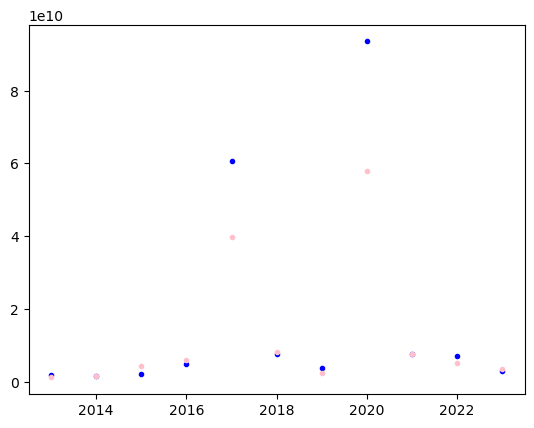

In [44]:
#delete me - DQ testing
plt.plot(y_test, marker='.', linestyle='None', c='blue')
plt.plot(y_pred_linReg_robust, marker='.', linestyle='None', c='pink')

plt.show()

#looks like mixing dataframe and numpy array are causing issues. predicted data is squished on the left end, creating huge residuals
# need to look into issues with model. data prior to going into model seems fine

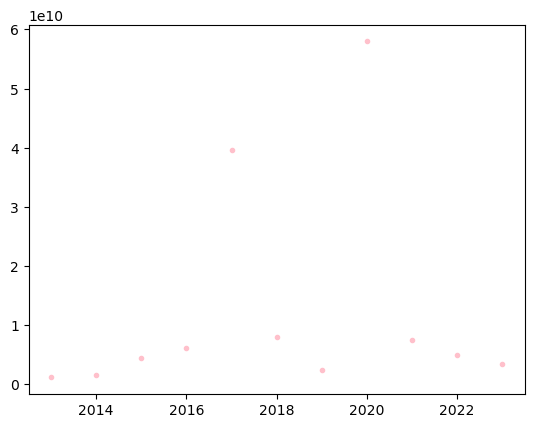

In [45]:
y_pred_linReg_robust = pd.DataFrame(y_pred_linReg_robust, index=y_test.index)
plt.plot(y_pred_linReg_robust, marker='.', linestyle='None', c='pink')

plt.show()


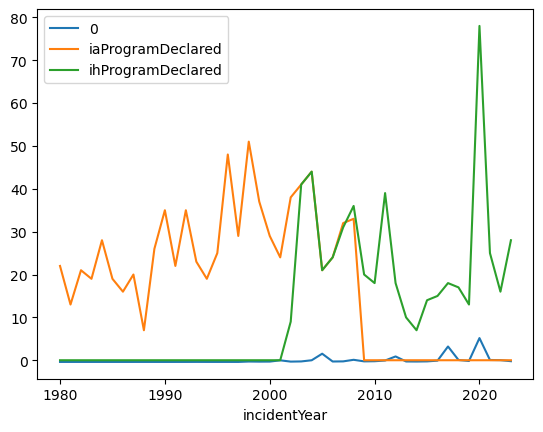

In [46]:
# scaler for tds
#tdcScaler = MinMaxScaler(feature_range=(0, 50))  # or MinMaxScaler()
tdcScaler = StandardScaler()  # or MinMaxScaler()
tdsScaled = pd.DataFrame(tdcScaler.fit_transform(femaAnnualStats['totalDisasterCost'].array.reshape(-1, 1)), index=femaAnnualStats.index)
#print(tdsScaled)

tdsScaled.plot()
femaAnnualStats['iaProgramDeclared'].plot()
#femaAnnualStats['paProgramDeclared'].plot()
#femaAnnualStats['hmProgramDeclared'].plot()
femaAnnualStats['ihProgramDeclared'].plot()
plt.legend()
plt.show()

In [47]:
# create new field
iaCutoverIhProgramDeclared = pd.concat(
    [femaAnnualStats['iaProgramDeclared'][femaAnnualStats.index < 2004 ], 
     femaAnnualStats['ihProgramDeclared'][femaAnnualStats.index >= 2004 ]])

In [48]:
# checking feature importances from random forest regression
featImps = zip(randForestReg.feature_names_in_, randForestReg.feature_importances_)
featImps = pd.DataFrame(featImps)

featImps.sort_values(1, ascending=False)

,0,1
85,stateCode_UT,4.706167e-01
5,totalAmountIhpApproved,4.216435e-01
7,totalObligatedAmountHmgp,7.068497e-02
74,stateCode_OH,1.725589e-02
22,incidentType_Severe Ice Storm,9.512170e-03
0,ihProgramDeclared,7.419694e-03
6,totalObligatedAmountPa,1.254254e-03
96,region_4,8.441620e-04
3,hmProgramDeclared,4.140002e-04
92,stateCode_WY,2.202617e-04


#### TODO

random forest regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

getting warn...
C:\Users\MG-Laptop\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(
C:\Users\MG-Laptop\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
  
maybe try converting data back to DF for predictions? 
helped for graphing but didnt fix metrics

- try killing outliers
- try scaling y
- check this code for data leakage...
    - # Fit the randomized search to data
    - random_search.fit(X, y)
    
- test models with a restricted set of features...maybe 3-5? and only use 1 cost featuresince they are all colinear (like obligatedPA) since that has the most impact
